# Workshop 2: Handwritten digit classification
In this workshop we will learn how to train a neural network with images 
as input to classify hand-written digits
([info of the data](http://yann.lecun.com/exdb/mnist/)). The main blocks of the workshop are:

1. Get the data from Keras repository and visualize it.
2. Pre-process the data.
3. Design the network.
4. Train the network.
5. Evaluate the model.

# 1. Get the data from Keras repository and visualize it.

In [1]:
# Import dependence to download the dataset
from tensorflow import keras
from keras.datasets import mnist

In [2]:
# The data, shuffled and split between train and testval sets
(X_train, y_train), (X_testval, y_testval) = mnist.load_data()

In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Show the shape of the data partitions (num images, pixel X pixel)
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_testval original shape: (10000, 28, 28)
y_testval original shape: (10000,)


In [5]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [6]:
# Show the data range of the data partitions
print("X_train original min value:", X_train.min())
print("X_train original max value:", X_testval.max())
print("X_testval original min value:", X_train.min())
print("X_testval original max value:", X_testval.max())

X_train original min value: 0
X_train original max value: 255
X_testval original min value: 0
X_testval original max value: 255


In [7]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


In [8]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

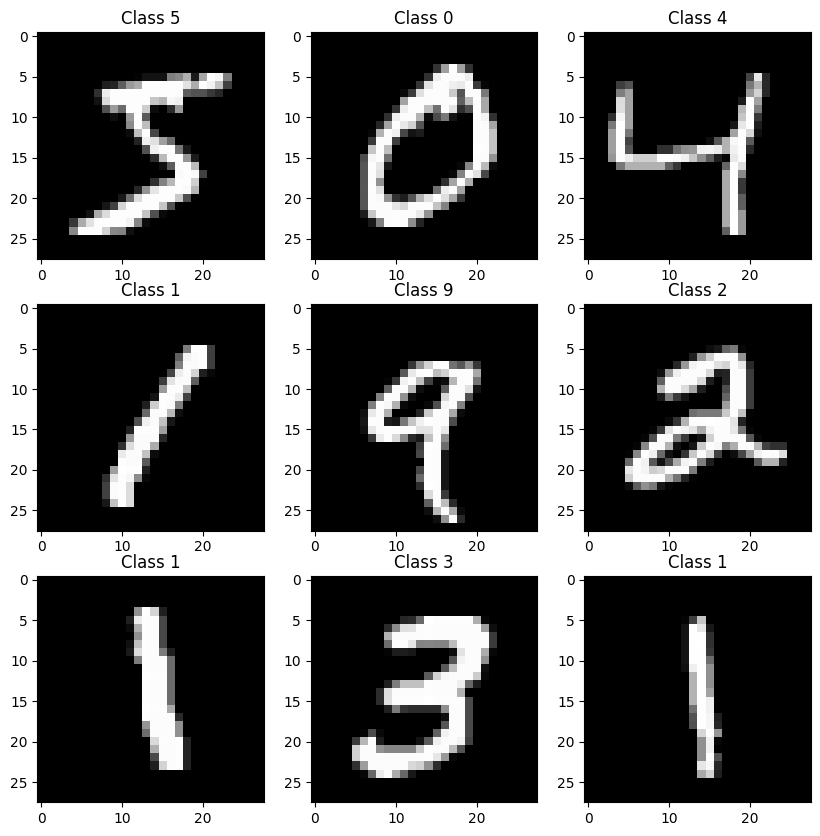

In [9]:
# Show 9 images with its respective ground truth labels
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none') # imshow permits showing images; cmap = to get colour distribution (by default with colours)
    plt.title("Class {}".format(y_train[i]))

# 2. Pre-process the data.


In [10]:
# Convert the 2D images to 1D array
X_train_rs = X_train.reshape(60000, 784)  # 784 = 28*28
X_testval_rs = X_testval.reshape(10000, 784)

In [11]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (60000, 784)
Testing matrix shape: (10000, 784)


In [12]:
# Convert dtype to float32 (int doesn't work well)
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [13]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [14]:
# Change the range of pixels from [0 255] to [0 1] (as range 0-1 works best)
X_train_fl /= 255
X_testval_fl /= 255

In [15]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [16]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [17]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(60000, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(10000, 1)).toarray()

In [18]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (60000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [19]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [20]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 784)
Testing matrix shape: (5000, 784)


# 3. Design the network.


In [21]:
# Import dependencies for network dessign
from keras.models import Model
from keras.layers import Input, Dense

In [22]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(32, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [23]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

# 4. Train the network.


In [25]:
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.5033 - accuracy: 0.8660 - val_loss: 0.3478 - val_accuracy: 0.9010
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2493 - accuracy: 0.9294 - val_loss: 0.2879 - val_accuracy: 0.9170
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2090 - accuracy: 0.9408 - val_loss: 0.2571 - val_accuracy: 0.9276
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1839 - accuracy: 0.9470 - val_loss: 0.2326 - val_accuracy: 0.9348
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1648 - accuracy: 0.9528 - val_loss: 0.2140 - val_accuracy: 0.9374
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1506 - accuracy: 0.9566 - val_loss: 0.2031 - val_accuracy: 0.9392
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1373 - accuracy: 0.9612 - val_loss: 0.1935 - val_accuracy: 0.9432
Epoch 

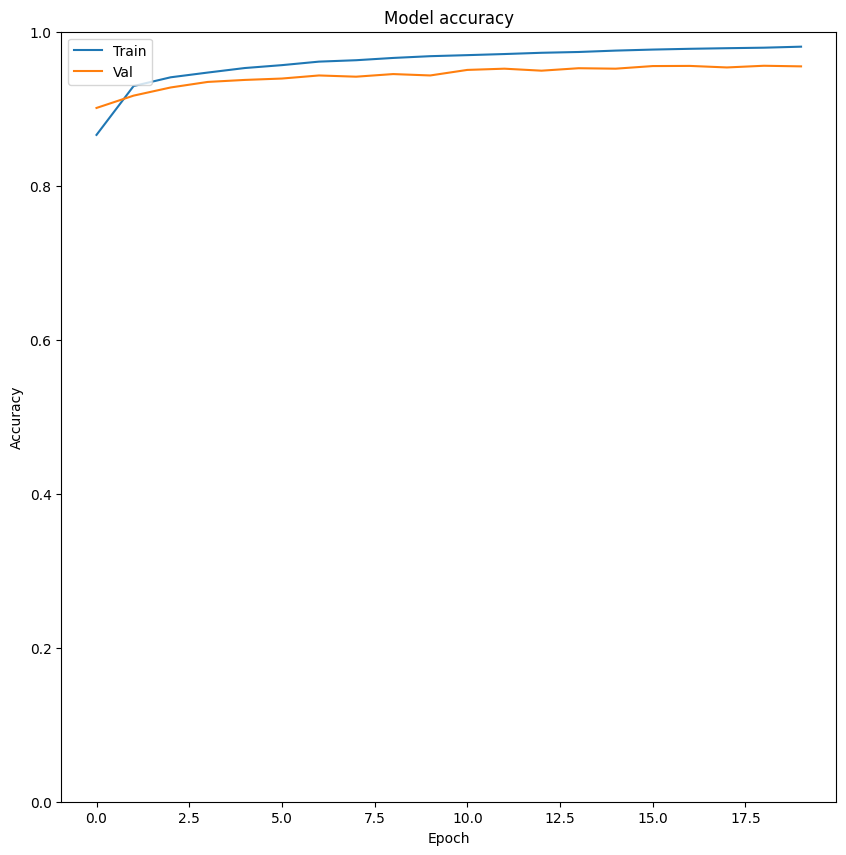

In [26]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

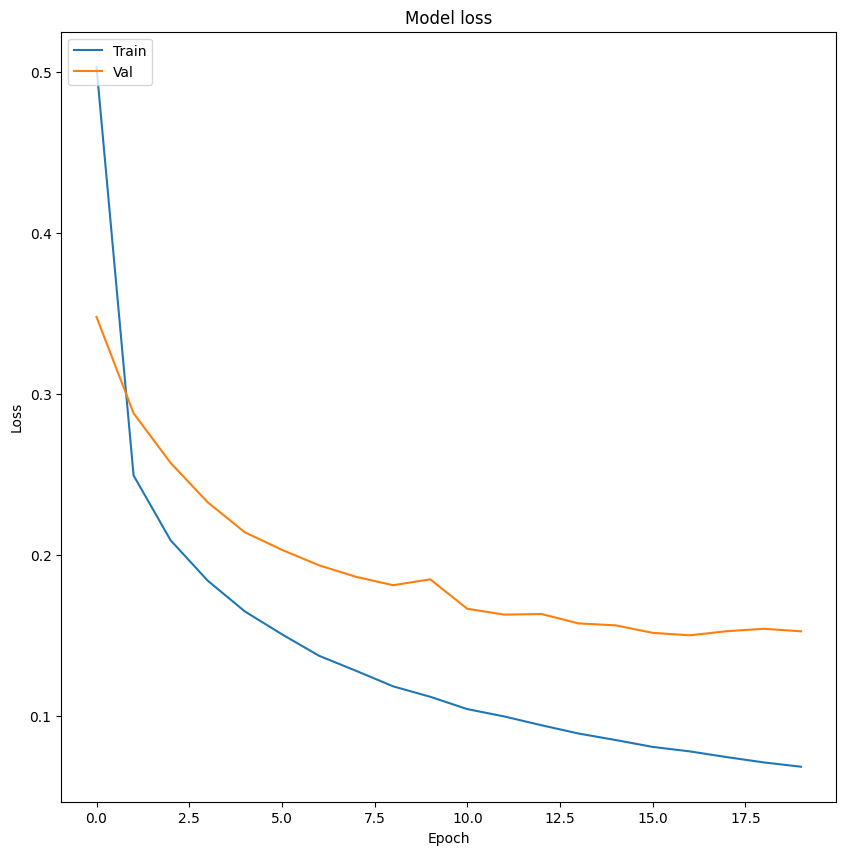

In [27]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [29]:
# Save the model
from pathlib import Path
path = Path('./models')
#path.mkdir()
model.save('./models/model_2.h5')

# 5. Evaluate the model.

In [30]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08727221935987473
Test accuracy: 0.9753999710083008


In [31]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
# predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 2ms/step


In [32]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [33]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [34]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

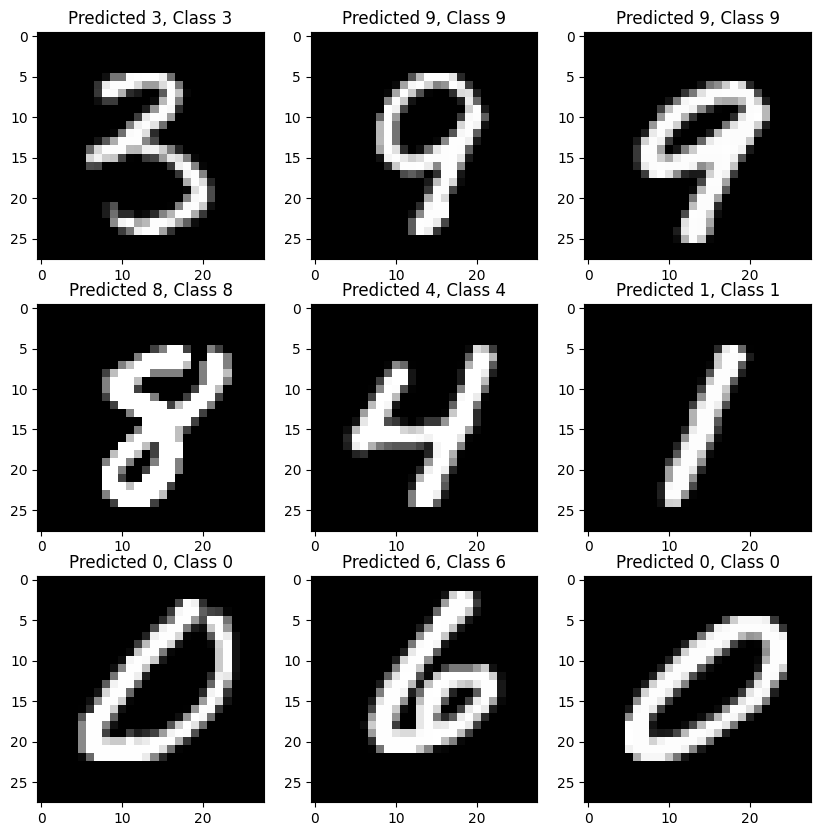

In [35]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], 
                                              y_test_scalar[correct]))

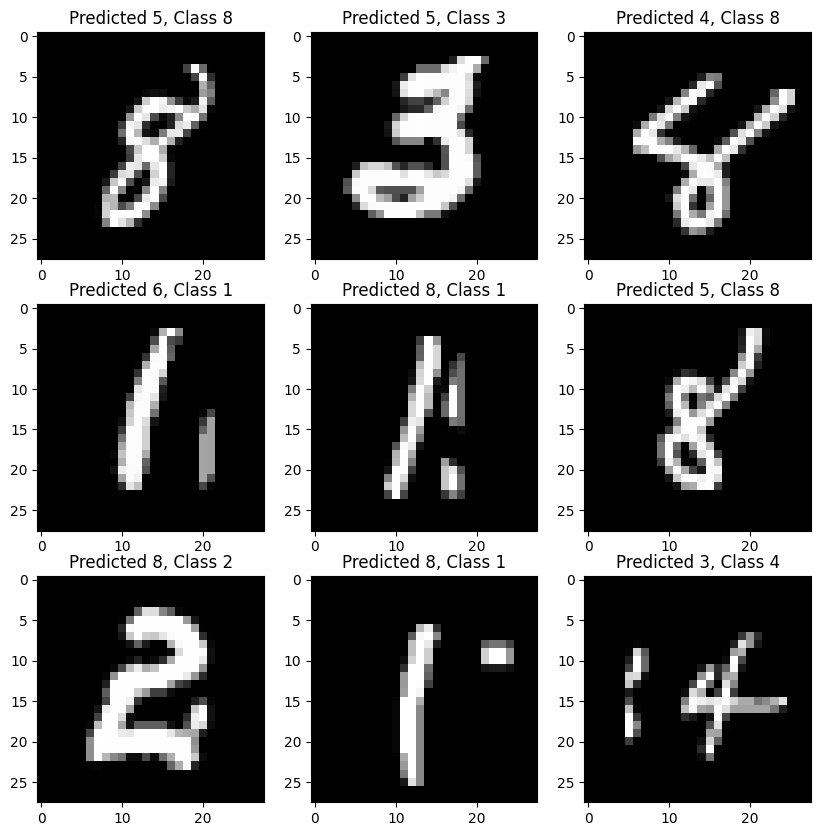

In [36]:
# Show some incorrectly classified samples (always better to plot the wrong predictions to improve the model training)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
                                              y_test_scalar[incorrect]))

# Exercise 1: Create a new model with 512 neurons in the hidden layer and repeat the process

In [37]:
# Design the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(512, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [38]:
# Show summary of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 0.2630 - accuracy: 0.9257 - val_loss: 0.1907 - val_accuracy: 0.9430
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1065 - accuracy: 0.9697 - val_loss: 0.1157 - val_accuracy: 0.9634
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.1055 - val_accuracy: 0.9658
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0497 - accuracy: 0.9855 - val_loss: 0.0874 - val_accuracy: 0.9724
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0961 - val_accuracy: 0.9680
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0273 - accuracy: 0.9926 - val_loss: 0.0834 - val_accuracy: 0.9734
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9946 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 

In [41]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03802437707781792
Test accuracy: 0.9900000095367432


# Exercise 2: Add a hidden layer with 512 neurons to the model of exercise 1 and repeat the process

In [42]:
# Design the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer1 = Dense(512, activation='relu')(input_layer)
hidden_layer2 = Dense(512, activation='relu')(hidden_layer1)
output_layer = Dense(10, activation='softmax')(hidden_layer2)
model= Model(inputs=input_layer, outputs=output_layer)

In [43]:
# Show summary of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [45]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.2228 - accuracy: 0.9345 - val_loss: 0.1262 - val_accuracy: 0.9620
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 0.1038 - val_accuracy: 0.9672
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.1089 - val_accuracy: 0.9656
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0995 - val_accuracy: 0.9672
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.1013 - val_accuracy: 0.9714
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.1245 - val_accuracy: 0.9678
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.9934 - val_loss: 0.1005 - val_accuracy: 0.9724
Epoch

In [46]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.049477994441986084
Test accuracy: 0.989799976348877


# Exercise 3: Train a model with CIFAR 10 dataset

[Dataset info](https://www.cs.toronto.edu/~kriz/cifar.html)

In [47]:
# Import dependence for downloading CIFAR10
from keras.datasets import cifar10

In [48]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

In [49]:
# Show the shape of the data partitions (num images, pixel X pixel x pixel)
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)
print("X_testval original shape:", X_testval.shape)
print("y_testval original shape:", y_testval.shape)

X_train original shape: (50000, 32, 32, 3)
y_train original shape: (50000, 1)
X_testval original shape: (10000, 32, 32, 3)
y_testval original shape: (10000, 1)


In [50]:
# Show the data type of the data partitions
print("X_train original dtype:", X_train.dtype)
print("y_train original dytpe:", y_train.dtype)
print("X_testval original dtype:", X_testval.dtype)
print("y_testval original dtype:", y_testval.dtype)

X_train original dtype: uint8
y_train original dytpe: uint8
X_testval original dtype: uint8
y_testval original dtype: uint8


In [51]:
# Show the data range of the data partitions
print("X_train original min value:", X_train.min())
print("X_train original max value:", X_testval.max())
print("X_testval original min value:", X_train.min())
print("X_testval original max value:", X_testval.max())

X_train original min value: 0
X_train original max value: 255
X_testval original min value: 0
X_testval original max value: 255


In [52]:
# Show the different labels of the data partitions
print("y_train labels: \n", np.unique(y_train))
print("y_testval labels: \n", np.unique(y_testval))

y_train labels: 
 [0 1 2 3 4 5 6 7 8 9]
y_testval labels: 
 [0 1 2 3 4 5 6 7 8 9]


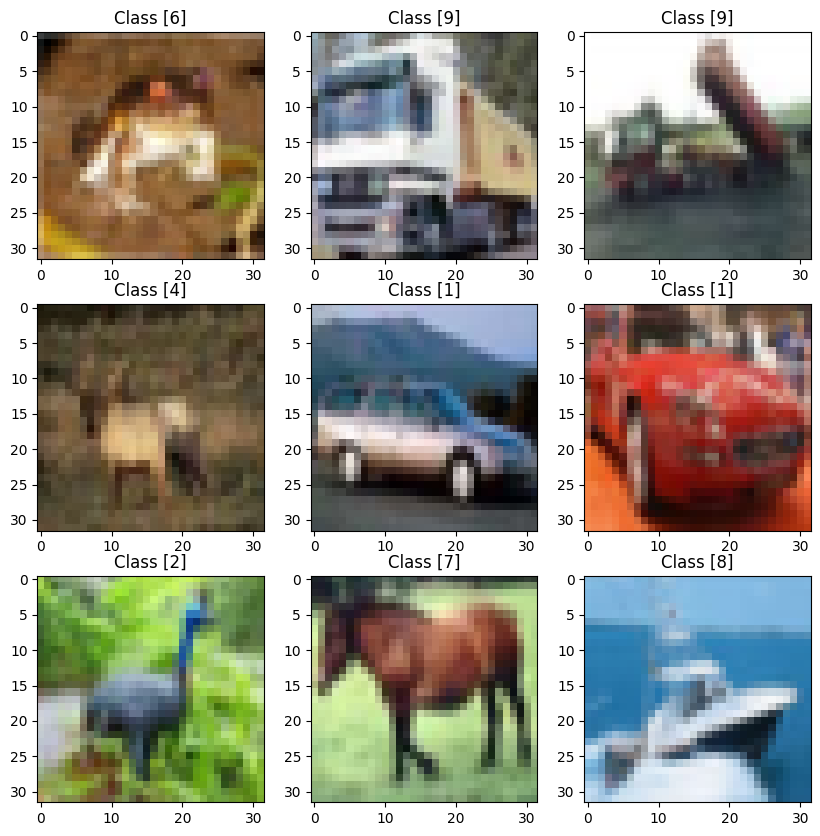

In [53]:
# Show 9 images with its respective ground truth labels
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for appropriate visualization
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none') # imshow permits showing images; cmap = to get colour distribution (by default with colours)
    plt.title("Class {}".format(y_train[i]))

In [55]:
# Convert the 3D images to 1D array
X_train_rs = X_train.reshape(50000, 3072)  # 3072 = 32*32*3
X_testval_rs = X_testval.reshape(10000, 3072)

In [56]:
# Show shape of the reshaped dataset
print("Training matrix shape:", X_train_rs.shape)
print("Testing matrix shape:", X_testval_rs.shape)

Training matrix shape: (50000, 3072)
Testing matrix shape: (10000, 3072)


In [57]:
# Convert dtype to float32 (int doesn't work well)
X_train_fl = X_train_rs.astype('float32')
X_testval_fl = X_testval_rs.astype('float32')

In [58]:
# Show dtype of the dataset
print("Training matrix dtype:", X_train_fl.dtype)
print("Testing matrix dtype:", X_testval_fl.dtype)

Training matrix dtype: float32
Testing matrix dtype: float32


In [59]:
# Change the range of pixels from [0 255] to [0 1] (as range 0-1 works best)
X_train_fl /= 255
X_testval_fl /= 255

In [60]:
# Show the range of pixels
print("Training matrix range:", "[", X_train_fl.min(), ",", X_train_fl.max(), "]")
print("Testing matrix range:", "[", X_testval_fl.min(), ",", X_testval_fl.max(), "]")

Training matrix range: [ 0.0 , 1.0 ]
Testing matrix range: [ 0.0 , 1.0 ]


In [62]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(50000, 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(10000, 1)).toarray()

In [63]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [64]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [65]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 3072)
Testing matrix shape: (5000, 3072)


In [66]:
# Define the model
input_layer = Input(shape=(X_train_fl.shape[1],))
hidden_layer = Dense(32, activation='relu')(input_layer)
output_layer = Dense(10, activation='softmax')(hidden_layer)
model= Model(inputs=input_layer, outputs=output_layer)

In [67]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_7 (Dense)             (None, 32)                98336     
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [69]:
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 3s 4ms/step - loss: 2.0118 - accuracy: 0.2656 - val_loss: 1.8808 - val_accuracy: 0.3278
Epoch 2/20
391/391 [==============================] - 1s 4ms/step - loss: 1.8627 - accuracy: 0.3310 - val_loss: 1.8152 - val_accuracy: 0.3582
Epoch 3/20
391/391 [==============================] - 1s 4ms/step - loss: 1.8171 - accuracy: 0.3525 - val_loss: 1.7977 - val_accuracy: 0.3468
Epoch 4/20
391/391 [==============================] - 1s 4ms/step - loss: 1.7929 - accuracy: 0.3604 - val_loss: 1.8014 - val_accuracy: 0.3556
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 1.7774 - accuracy: 0.3655 - val_loss: 1.7696 - val_accuracy: 0.3664
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 1.7618 - accuracy: 0.3748 - val_loss: 1.7751 - val_accuracy: 0.3734
Epoch 7/20
391/391 [==============================] - 1s 4ms/step - loss: 1.7536 - accuracy: 0.3757 - val_loss: 1.7464 - val_accuracy: 0.3728
Epoch 

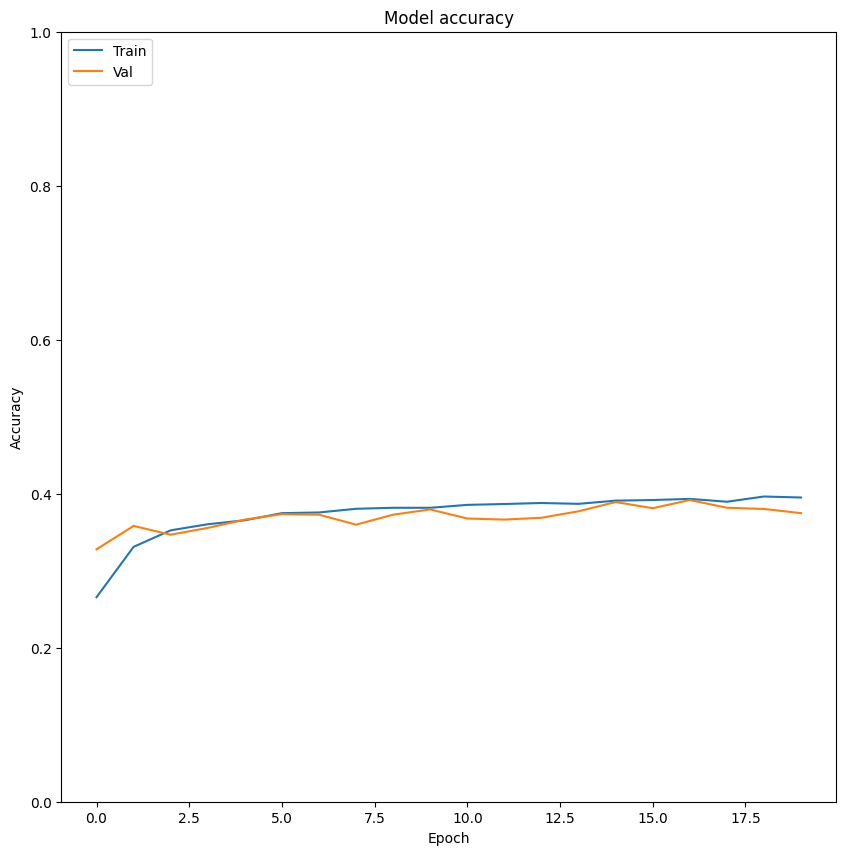

In [70]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

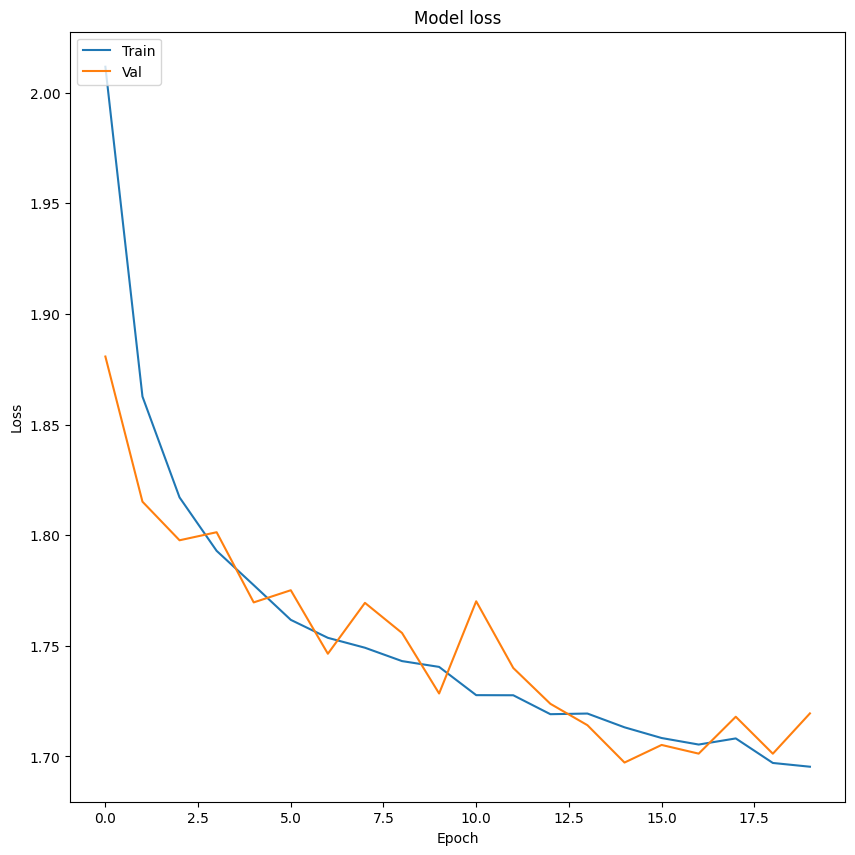

In [71]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

In [72]:
# Save the model
model.save('./models/model_3.h5')


In [74]:
# Obtain metrics in the test partition
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.7576615810394287
Test accuracy: 0.3747999966144562


In [76]:
# Predict test samples post-process them
predicted_classes = model.predict(X_test)
# predicted_classes = np.round(predicted_classes)
predicted_classes = np.argmax(predicted_classes, axis=1)

157/157 [==============================] - 0s 1ms/step


In [77]:
# Convert test labels to scalars
y_test_scalar = np.argmax(y_test, axis=1)

In [78]:
# Obtain test samples correctly predicted
correct_indices = np.nonzero(predicted_classes == y_test_scalar)[0]

In [79]:
# Obtain test samples incorrectly predicted
incorrect_indices = np.nonzero(predicted_classes != y_test_scalar)[0]

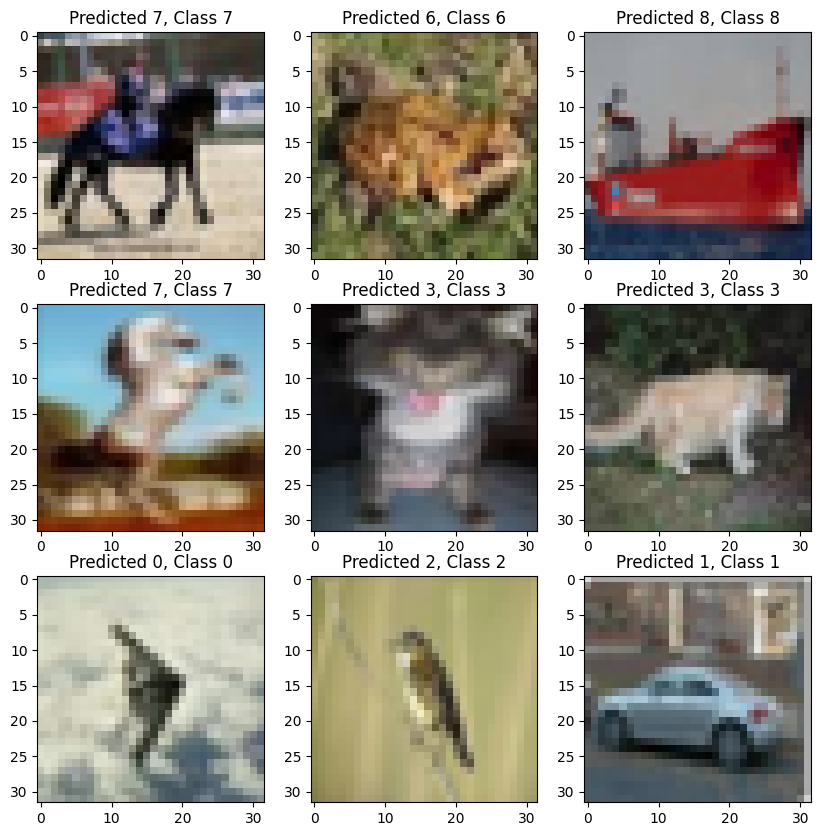

In [81]:
# Show some correctly classified samples
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32, 3), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], 
                                              y_test_scalar[correct]))

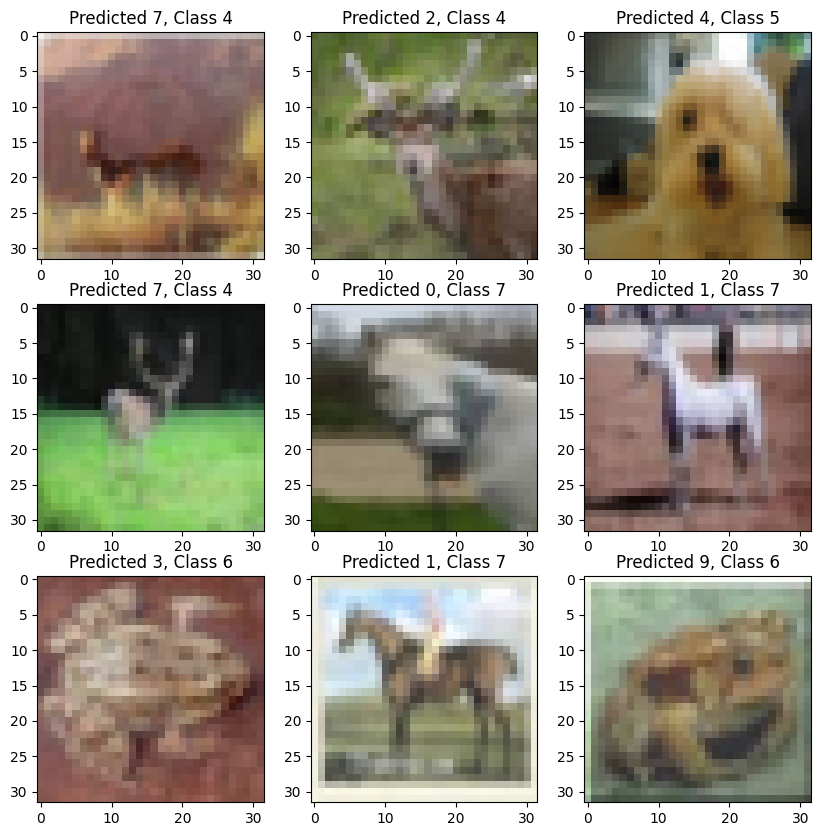

In [82]:
# Show some incorrectly classified samples (always better to plot the wrong predictions to improve the model training)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32, 3), cmap='gray', 
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
                                              y_test_scalar[incorrect]))